# Data Aggregation

## I. Import Essential Libraries

In [8]:
# core packages
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix

# image packages
import rasterio as rio
import cv2

# visualization packages
import matplotlib.pyplot as plt

## II. Load Data

In [23]:
def load_data(path_dict):
    data_dict = dict()
    for key, value in path_dict.items():
        with rio.open(value) as src:
            data = src.read()
            data = np.squeeze(data).astype("float32")
            data_dict[key] = data
            plt.imshow(data)
            plt.show()
    
    # split defor data by years and add to result
    for year in np.unique(data_dict["defor"]):
        if year == 0:
            continue
        print("Splitting year {}".format(int(2000 + year)))
        # split years
        data_dict["defor_{}".format(int(2000 + year))] = csr_matrix((data_dict["defor"] == year).astype(int))
    
    data_dict.pop("defor")
    return data_dict

## III. Gridding Using OpenCV Inter Area
https://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html#resize

In [32]:
def grid_data(data_dict, grid_size):
    result = dict()
    for key, val in data_dict.items():
        if (key[0:5] == "defor"):
            grid deforestation data
            grid = cv2.resize(np.array(val.todense()).astype("float32"), dsize=(grid_size, grid_size), interpolation = cv2.INTER_AREA)
        else:
            # grid non-deforestation data
            grid = cv2.resize(val, dsize=(grid_size, grid_size), interpolation = cv2.INTER_AREA)
        result["{k}_grid".format(k = key)] = grid

    return result

## IV. Write To CSV

In [58]:
def write_csv(grid_dict, grid_size):
    # get the rows and cols
    row = np.arange(grid_size ** 2) // grid_size
    col = np.arange(grid_size ** 2) % grid_size
    
    # define dataframe and set row and cols
    df = pd.DataFrame(index = row * grid_size + col)
    df["row"] = row
    df["col"] = col

    # add data to dataframe
    for key, val in grid_dict.items():
        df[key] = val.flatten()
        
    # write dataframe to csv
    output_path = "../data/processed/aggregate.csv"
    df.to_csv(output_path, index_label = "id")
        

## V. Execute Functions

In [34]:
# constants
GRID_SIZE = 500
LAT, LONG = ("10S", "60W")

# paths to segmented data (ADD YOUR PATH HERE)
defor_img_path = "../data/raw/segmented/{lat}{long}/defor_{lat}{long}.tif".format(lat = LAT, long = LONG)
maize_data_path = "../data/raw/segmented/{lat}{long}/maize_{lat}{long}.tif".format(lat = LAT, long = LONG)
soy_data_path = "../data/raw/segmented/{lat}{long}/soy_{lat}{long}.tif".format(lat = LAT, long = LONG)

path_dict = {"defor": defor_img_path, 
         "maize": maize_data_path, 
         "soy": soy_data_path}

years = np.arange(2001, 2019)
for yr in years: 
    chirps_data_path = "../data/raw/segmented/{lat}{long}/chirps_{yr}_{lat}{long}.tif".format(yr = yr, lat = LAT, long = LONG)
    path_dict["chirps_{yr}".format(yr = yr)] = chirps_data_path
# path dictionary (ADD YOUR PATH VARIABLE HERE)
print(path_dict)


{'chirps_2001': '../data/raw/segmented/10S60W/chirps_2001_10S60W.tif', 'chirps_2002': '../data/raw/segmented/10S60W/chirps_2002_10S60W.tif', 'chirps_2003': '../data/raw/segmented/10S60W/chirps_2003_10S60W.tif', 'chirps_2004': '../data/raw/segmented/10S60W/chirps_2004_10S60W.tif', 'chirps_2005': '../data/raw/segmented/10S60W/chirps_2005_10S60W.tif', 'chirps_2006': '../data/raw/segmented/10S60W/chirps_2006_10S60W.tif', 'chirps_2007': '../data/raw/segmented/10S60W/chirps_2007_10S60W.tif', 'chirps_2008': '../data/raw/segmented/10S60W/chirps_2008_10S60W.tif', 'chirps_2009': '../data/raw/segmented/10S60W/chirps_2009_10S60W.tif', 'chirps_2010': '../data/raw/segmented/10S60W/chirps_2010_10S60W.tif', 'chirps_2011': '../data/raw/segmented/10S60W/chirps_2011_10S60W.tif', 'chirps_2012': '../data/raw/segmented/10S60W/chirps_2012_10S60W.tif', 'chirps_2013': '../data/raw/segmented/10S60W/chirps_2013_10S60W.tif', 'chirps_2014': '../data/raw/segmented/10S60W/chirps_2014_10S60W.tif', 'chirps_2015': '../

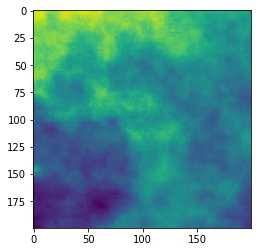

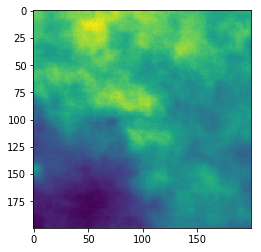

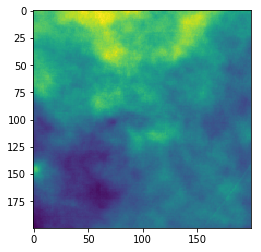

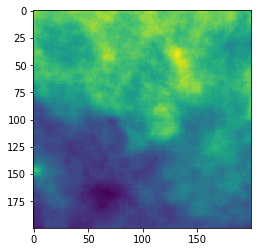

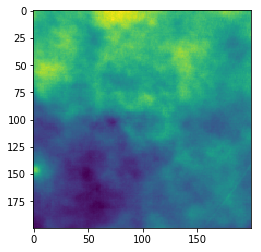

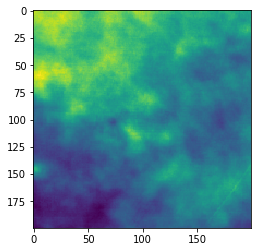

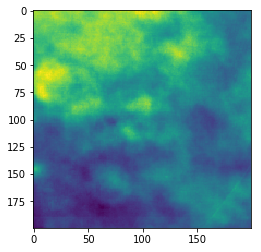

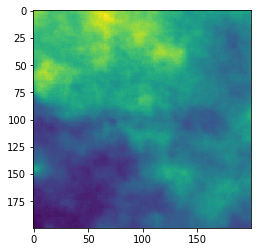

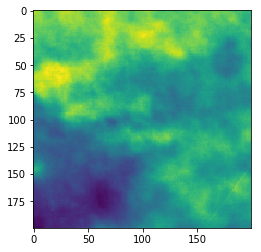

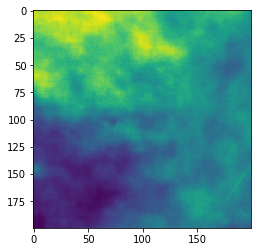

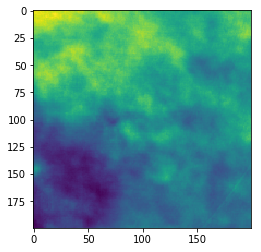

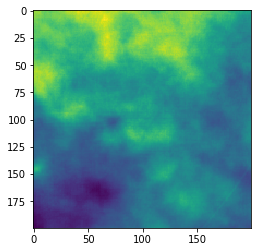

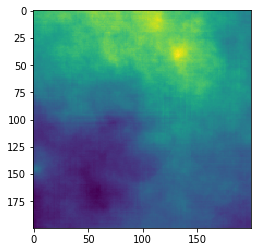

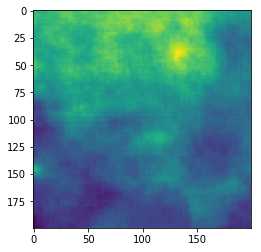

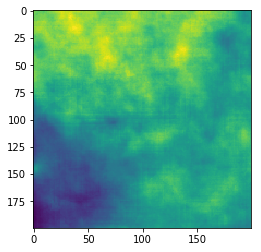

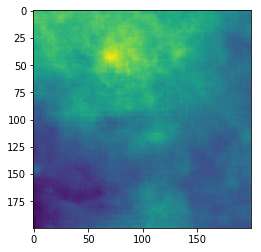

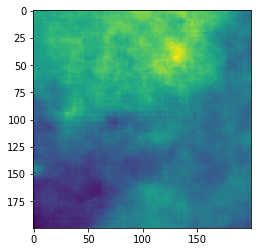

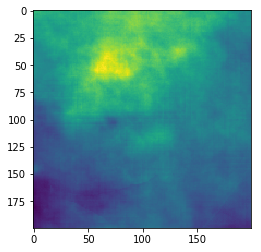

In [35]:
# load data
data_dict = load_data(path_dict)


In [59]:
# grid data
grid_dict = grid_data(data_dict, GRID_SIZE)


In [60]:
# write data to csv
write_csv(grid_dict, GRID_SIZE)

In [69]:
# merging new data with previous aggregate 
def merge_data(aggregate_path, new_path, name = "aggregate"):
    agg = pd.read_csv(aggregate_path)
    new = pd.read_csv(new_path)
    merged_data = pd.merge(agg, new)
    merged_data.to_csv("../data/processed/{name}.csv".format(name = name), index = False)
    print(read_csv("../data/processed/{name}.csv".format(name = name)))